In [1]:
# autoreload
%load_ext autoreload
%autoreload 2


In [2]:
import os

os.chdir("..")

In [3]:
import torch
import torchvision.transforms as transforms
from datasets.TransformDataset import TransformDataset
from datasets.BaseDataset import BaseDataset
import matplotlib.pyplot as plt

In [4]:
# select checkpoint
MODEL = "models/checkpoints/unet-v1.pt"

In [5]:
# load checkpoint
checkpoint = torch.load(MODEL)
# create model
model = torch.hub.load(
    "milesial/Pytorch-UNet", "unet_carvana", pretrained=False, scale=0.5
)
# model = torch.hub.load('mateuszbuda/brain-segmentation-pytorch', 'unet', in_channels=3, out_channels=1, init_features=32, pretrained=False)
# load model weights
model.load_state_dict(checkpoint)

Using cache found in /home/stef/.cache/torch/hub/milesial_Pytorch-UNet_master


<All keys matched successfully>

In [6]:
# paths to image and ground truth folders
image_folder = "datasets/train/images/"
gt_folder = "datasets/train/groundtruth/"

dataset = BaseDataset(image_folder, gt_folder)

# split the dataset into training and validation sets
train_set, val_set = torch.utils.data.random_split(
    dataset, [int(0.8 * len(dataset)), int(0.2 * len(dataset))]
)

# define data transform (same for images and groundtruth)
transform = transforms.Compose(
    [
        transforms.Resize((400, 400)),  # crashes with 400 x 400
        transforms.ToTensor(),
    ]
)
# transforms
train_set = TransformDataset(
    train_set, image_transform=transform, gt_transform=transform
)
val_set = TransformDataset(val_set, image_transform=transform, gt_transform=transform)

# define batch size
batch_size = 2

# create data loaders
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=batch_size, shuffle=True)

FIX THIS!!

In [7]:
transform = transforms.ToTensor()

torch.Size([1, 2, 400, 400])


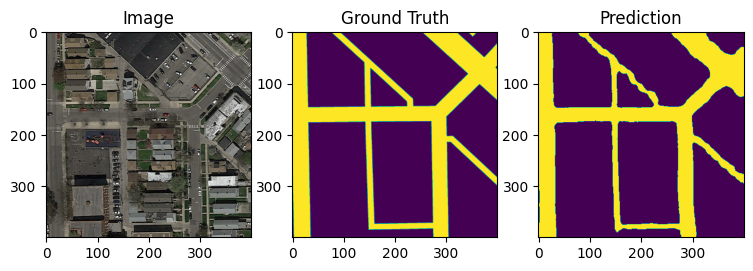

torch.Size([1, 2, 400, 400])


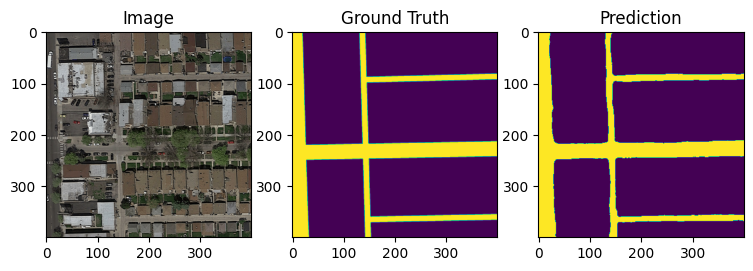

torch.Size([1, 2, 400, 400])


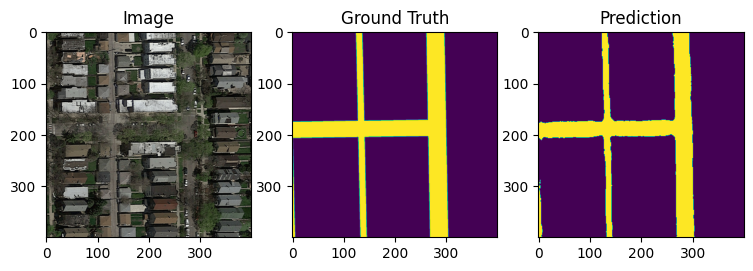

torch.Size([1, 2, 400, 400])


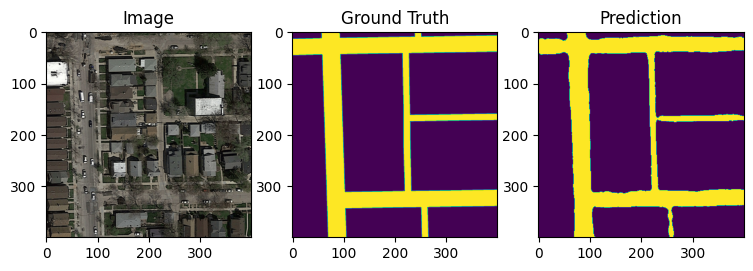

torch.Size([1, 2, 400, 400])


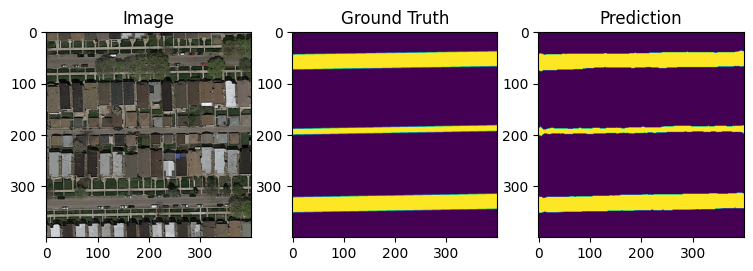

torch.Size([1, 2, 400, 400])


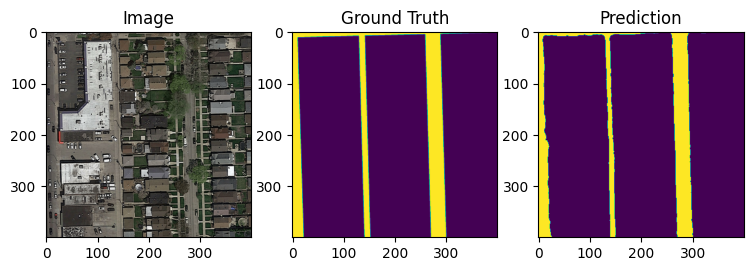

torch.Size([1, 2, 400, 400])


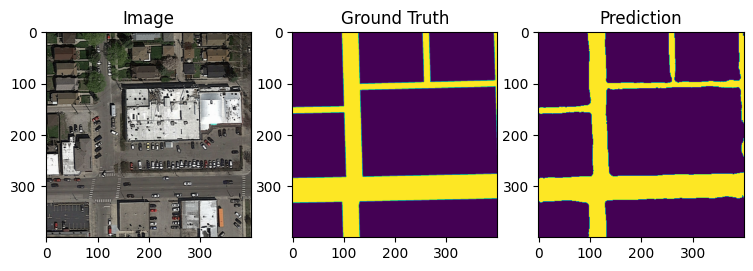

torch.Size([1, 2, 400, 400])


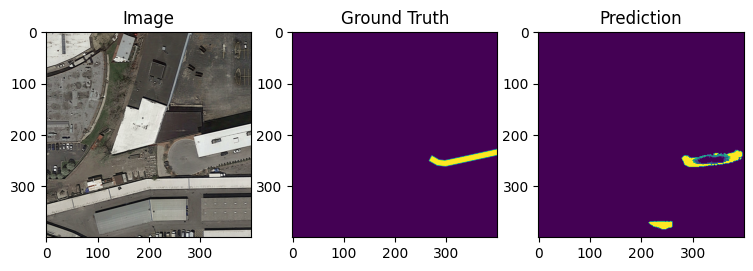

torch.Size([1, 2, 400, 400])


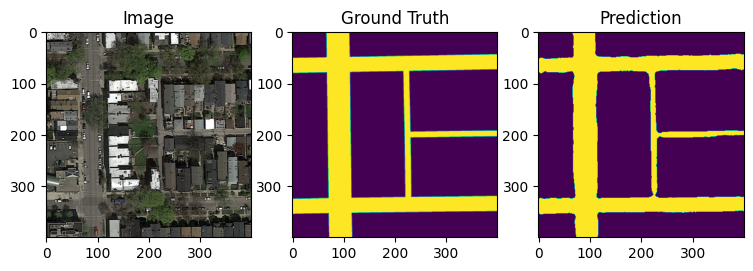

torch.Size([1, 2, 400, 400])


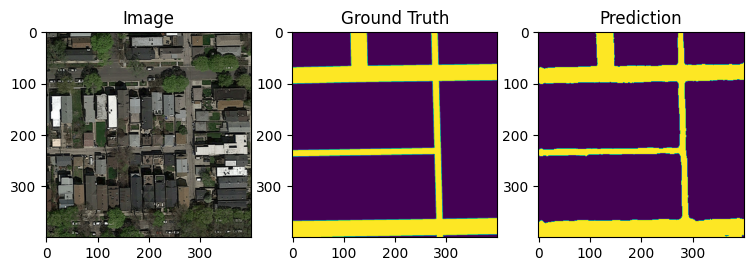

In [8]:
for K in range(10):
    # get image and ground truth
    image = transform(dataset[K][0])
    gt = transform(dataset[K][1])
    # predict
    pred = model(image.unsqueeze(0))
    print(pred.shape)
    # convert to numpy array
    image = image.numpy().transpose(1, 2, 0)
    gt = gt.numpy().squeeze(0)

    # for mateuszbuda [1, 1, 400, 400]
    # pred = pred.detach().numpy().squeeze(0).squeeze(0)

    # for milesial [1, 2, 400, 400]
    pred = pred[:, [0], :, :]
    pred = pred.detach().numpy().squeeze(0).squeeze(0)

    # threshold
    pred[pred <= 0.5] = 0
    pred[pred > 0.5] = 1
    # plot
    fig, ax = plt.subplots(1, 3, figsize=(9, 3))
    ax[0].imshow(image)
    ax[0].set_title("Image")
    ax[1].imshow(gt)
    ax[1].set_title("Ground Truth")
    ax[2].imshow(pred)
    ax[2].set_title("Prediction")
    plt.show()